<a href="https://colab.research.google.com/github/Shiva120293/Yes_bank-stock-pred/blob/main/Yes_Bank_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
Time Series forecasting & modeling plays an important role in data analysis. Time series analysis is a specialized branch of statistics used extensively in fields such as Econometrics & Operation Research.

Time Series is being widely used in analytics & data science. This problem of Yes Bank Stock Price is essentially a time series problem as we need to forecast traffic here.

#Understanding the Problem Statement
Here in this problem set first it’s important to establish what we’re aiming to solve. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.


our focus will be on the technical analysis part. We’ll be using a dataset of Yes Bank Stock price for this particular project.

#Importing important libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from numpy import math
import pickle
from sklearn.metrics import r2_score

**Mounting the drive and importing the dataset**

In [3]:
# Mounting the drive first

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the csv file.

df = pd.read_csv('/content/drive/My Drive/Projects/NEW_PROJ/YesBank_StockPrices.csv')

#Also making a copy of dataset so to avoid any data losses
df1 = df.copy()

**Let us now view first few rows of the dataset**

In [5]:
df1.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


**Dataset Summary**

There are multiple variables in the dataset – date, open, high, low, close.

The columns **Open and Close** represent the **starting and final price** at which the **stock** is traded on a particular day.

**High and Low** represent the maximum, minimum, and last price of the share for the day.


In [6]:
df1.shape

(185, 5)

So we have **185 rows** and **5 columns**

In [7]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**Let us examine the dataset how actually it looks like**

In [8]:
df1.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df1.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
df1.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [12]:
df1["Date"]=pd.to_datetime(df1["Date"], errors = 'coerce')


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    0 non-null      datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


The **profit or loss** calculation is usually determined by the **closing price** of a stock for the day, hence we will consider the **closing price** as the **target variable**. Let’s **plot** the **target** variable to understand how it’s *shaping up* in our data:

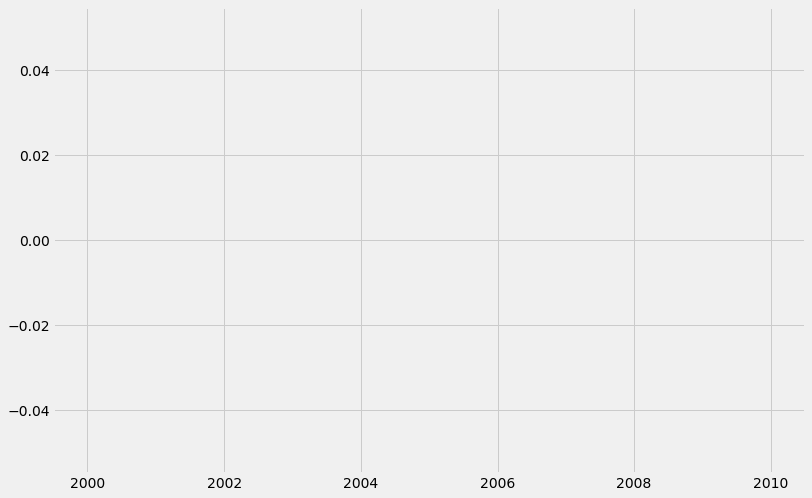

In [15]:
#setting index as date
df1['Date'] = pd.to_datetime(df1.Date,format='%Y-%m-%d')
df1.index = df1['Date']

#plot
plt.figure(figsize=(12,8))
plt.plot(df1['Close'], label='Close Price history')